Accuracy = 0.6666666666666666


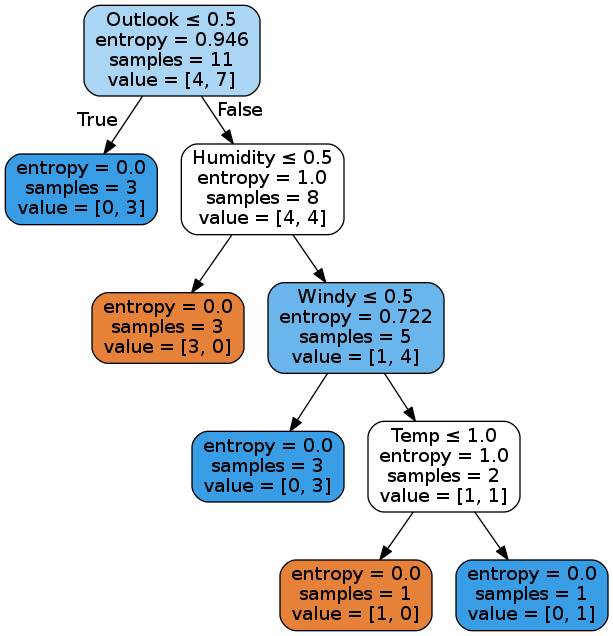

In [139]:
import pandas as pd
import numpy as np
import pydotplus as pdp
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import display,Image

f = open(r"info_gain.csv")
test = pd.read_csv(f)
#print(test)


#X = test.drop('Y', axis = 1)
l = preprocessing.LabelEncoder()
test['Outlook'] = l.fit_transform(test['Outlook'])
test['Temp'] = l.fit_transform(test['Temp'])
test['Humidity'] = l.fit_transform(test['Humidity'])
test['Windy'] = l.fit_transform(test['Windy'])

#print(test['Outlook'])
X = test.drop(['Play_Golf'], axis = 1)

#print(X)

# split traning data & test data
# 隨便選出2/10個樣本
x0, x1, y0, y1 = train_test_split(X, test['Play_Golf'], test_size = 0.2, random_state = 1)
#print(y1)


model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

tt1 = model.fit(x0, y0)
#print(tt1)

predicted = tt1.predict(x1)
pp0 = metrics.accuracy_score(y1, tt1.predict(x1))
print("Accuracy =", pp0)

d = StringIO()
#print(X.columns)
export_graphviz(tt1, filled=True, rounded=True, special_characters=True, out_file = d, feature_names = X.columns)


#d.getvalue()
g = pdp.graph_from_dot_data(d.getvalue())

display(Image(g.create_png()))

Accuracy = 0.8333333333333334


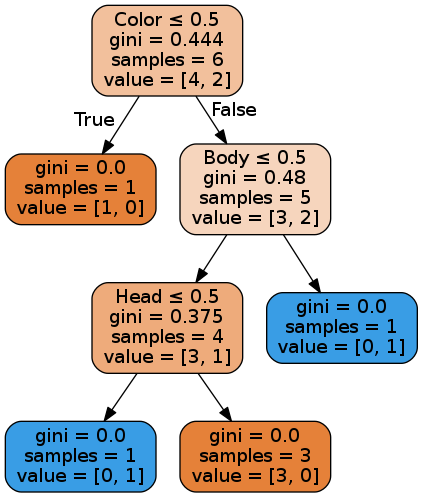

In [130]:
import pandas as pd
import numpy as np
import pydotplus as pdp
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import display,Image

f = open(r"gini.csv")
test = pd.read_csv(f)
#print(test)


#X = test.drop('Y', axis = 1)
l = preprocessing.LabelEncoder()
test['Head'] = l.fit_transform(test['Head'])
test['Body'] = l.fit_transform(test['Body'])
test['Color'] = l.fit_transform(test['Color'])

#print(test)
X = test.drop(['Y'], axis = 1)

#print(X)

# split traning data & test data
# 隨便選出5/10個樣本
x0, x1, y0, y1 = train_test_split(X, test['Y'], test_size = 0.5, random_state = 1)
#print(y1)


model = tree.DecisionTreeClassifier(criterion = 'gini')

tt1 = model.fit(x0, y0)
#print(tt1)

predicted = tt1.predict(x1)
pp0 = metrics.accuracy_score(y1, tt1.predict(x1))
print("Accuracy =", pp0)

d = StringIO()
#print(X.columns)
export_graphviz(tt1, filled=True, rounded=True, special_characters=True, out_file = d, feature_names = X.columns)


#d.getvalue()
g = pdp.graph_from_dot_data(d.getvalue())

display(Image(g.create_png()))